In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
data = pd.read_csv('/content/drive/My Drive/transfers2.csv', sep=",")

In [39]:
data.shape

(6237, 10)

In [40]:
data.dtypes

PLAYER          object
WINDOW          object
POSITION        object
COUNTRY         object
FROM            object
TO              object
DESCRIPTION     object
PRICE          float64
LEAGUE          object
SEASON          object
dtype: object

In [41]:
data.isnull().sum()

PLAYER            1
WINDOW            1
POSITION       1128
COUNTRY         826
FROM              2
TO                1
DESCRIPTION       1
PRICE             1
LEAGUE            1
SEASON            1
dtype: int64

In [42]:
data.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17


In [22]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6237, 10), (6237, 0))

In [43]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6237, 10), (5109, 10))

In [45]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,0,0,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17


In [50]:
num_cols = []
total_count = 205
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка PRICE. Тип данных float64. Количество пустых значений 4340, 2117.07%.


In [51]:
data_num = data[num_cols]
data_num

,PRICE
0,105000000.0
1,100000000.0
2,95000000.0
3,93900000.0
4,90000000.0
...,...
6232,NaN
6233,NaN
6234,NaN
6235,NaN


In [52]:
flt_index = data[data['POSITION'].isnull()].index
flt_index

Int64Index([   3,    9,   10,   14,   29,   32,   33,   57,   60,   63,
            ...
            6225, 6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6236],
           dtype='int64', length=1128)

In [53]:
# Строки с пустыми ячейками
data[data.index.isin(flt_index)]

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
9,Zlatan Ibrahimovic,Pre-Season,NaN,NaN,Inter Milan,Barcelona,Sold,69000000.0,La Liga,09/10
10,Kaka,Pre-Season,NaN,NaN,AC Milan,Real Madrid,Sold,68400000.0,La Liga,09/10
14,Fernando Torres,Mid-Season,NaN,Spain,Liverpool,Chelsea,Sold,58400000.0,EPL,10/11
29,Juan Mata,Mid-Season,NaN,Spain,Chelsea,Manchester United,Sold,44700000.0,EPL,13/14
...,...,...,...,...,...,...,...,...,...,...
6230,Ronald Zubar,Pre-Season,NaN,NaN,Olympique Marseille,Wolverhampton,Undisclosed,NaN,EPL,09/10
6231,Greg Halford,Pre-Season,NaN,NaN,Sunderland,Wolverhampton,Undisclosed,NaN,EPL,09/10
6232,Andrew Surman,Pre-Season,NaN,NaN,Southampton,Wolverhampton,Undisclosed,NaN,EPL,09/10
6233,Ivan Amaya,Pre-Season,NaN,NaN,Elche,Udinese,Undisclosed,NaN,Serie A,09/10


In [56]:
data_num_price = data_num[['PRICE']]
data_num_price.head()


,PRICE
0,105000000.0
1,100000000.0
2,95000000.0
3,93900000.0
4,90000000.0


In [57]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [58]:
# True - содержит пропущенное значение
# False - не содержит

indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_price)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [59]:
#С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения
strategies=['mean', 'median','most_frequent']

In [60]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_price)
    return data_num_imp[mask_missing_values_only]

In [61]:
# Заполнение средними значениями
strategies[0], test_num_impute(strategies[0])

('mean',
 array([9067177.12177122, 9067177.12177122, 9067177.12177122, ...,
        9067177.12177122, 9067177.12177122, 9067177.12177122]))

In [62]:
# Заполнение медианой
strategies[1], test_num_impute(strategies[1])

('median',
 array([5500000., 5500000., 5500000., ..., 5500000., 5500000., 5500000.]))

In [63]:
# Заполнение наиболее часто встречающимся
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([3000000., 3000000., 3000000., ..., 3000000., 3000000., 3000000.]))

In [64]:
#Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [66]:
data[['PRICE']].describe()

,PRICE
count,1.897000e+03
mean,9.067177e+06
std,1.088986e+07
min,3.000000e+04
25%,2.500000e+06
50%,5.500000e+06
75%,1.100000e+07
max,1.050000e+08


In [67]:
test_num_impute_col(data, 'PRICE', strategies[0])

('PRICE', 'mean', 4340, 9067177.121771218, 9067177.121771218)

In [68]:
test_num_impute_col(data, 'PRICE', strategies[1])

('PRICE', 'median', 4340, 5500000.0, 5500000.0)

In [69]:
test_num_impute_col(data, 'PRICE', strategies[2])

('PRICE', 'most_frequent', 4340, 3000000.0, 3000000.0)

In [70]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка "{}". Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка "PLAYER". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "WINDOW". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "POSITION". Тип данных object. Количество пустых значений 1128, 550.24%.
Колонка "COUNTRY". Тип данных object. Количество пустых значений 826, 402.93%.
Колонка "FROM". Тип данных object. Количество пустых значений 2, 0.98%.
Колонка "TO". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "DESCRIPTION". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "LEAGUE". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "SEASON". Тип данных object. Количество пустых значений 1, 0.49%.


In [74]:
#Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".
cat_temp_data = data[['COUNTRY']]
cat_temp_data.head()

,COUNTRY
0,France
1,Wales
2,Uruguay
3,NaN
4,Argentina


In [75]:
cat_temp_data['COUNTRY'].unique()

array(['France', 'Wales', 'Uruguay', nan, 'Argentina', 'Colombia',
       'Belgium', 'England', 'Spain', 'Brazil', 'Portugal', 'Germany',
       'Switzerland', 'Chile', 'Senegal', 'Ivory Coast', 'Poland',
       'Turkey', 'Croatia', 'Algeria', 'Netherlands', 'Bosnia', 'Morocco',
       'Tunisia', 'DR Congo', 'Armenia', 'South Korea', 'Italy', 'Ghana',
       'Montenegro', 'Cameroon', 'Serbia', 'Egypt', 'Sweden', 'Russia',
       'Belgian', 'Venezuela', 'Austria', 'Nigeria', 'Slovenia', 'Gabon',
       'Ukraine', 'Ireland', 'Ecuador', 'Denmark', 'Japan', 'Scotland',
       'Guinea', 'Kenya', 'Congo', 'Mali', 'Hungary', 'Czech Rep.',
       'Greece', 'Mexico', 'Costa Rica', 'Romania', 'Iceland', 'Jamaica',
       'Honduras', 'Paraguay', 'N. Ireland', 'Czech Republic',
       'FYR Macedonia', 'USA', 'Australia', 'Benin', 'Slovakia', 'Israel',
       'Angola', 'Togo', 'Albania', 'Bulgaria', 'South Africa',
       'Rep. of Ireland', 'Estonia', 'Norway', 'United States', 'Moldova',
       'O

In [77]:
cat_temp_data[cat_temp_data['COUNTRY'].isnull()].shape

(826, 1)

In [78]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['France'],
       ['Wales'],
       ['Uruguay'],
       ...,
       ['Portugal'],
       ['Uganda'],
       ['Italy']], dtype=object)

In [79]:
np.unique(data_imp2)

array(['Albania', 'Algeria', 'Angola', 'Aragentina', 'Argenina',
       'Argentina', 'Armenia', 'Australia', 'Australian', 'Austria',
       'Belarus', 'Belgian', 'Belgium', 'Benin', 'Bolivia', 'Bosnia',
       'Brazil', 'Breno', 'Bulgaria', 'Burkina Faso', 'Cameroon',
       'Camerooon', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo DR', 'Costa Rica', 'Croatia', 'Curacao',
       'Cyprus', 'Czech Rep', 'Czech Rep.', 'Czech Republic', 'DR Congo',
       'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equador',
       'Estonia', 'FYR Macedonia', 'Faroe Islands', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Gemany', 'Georgia', 'Germany',
       'Germay', 'Ghana', 'Greec', 'Greece', 'Guadeloupe', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holland',
       'Honduras', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Kenya',
       'La

In [80]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='const')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['France'],
       ['Wales'],
       ['Uruguay'],
       ...,
       ['Portugal'],
       ['Uganda'],
       ['const']], dtype=object)

### **Преобразование категориальных признаков в числовые**

In [81]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,France
1,Wales
2,Uruguay
3,Italy
4,Argentina
...,...
6232,Italy
6233,Italy
6234,Portugal
6235,Uganda



### **Кодирование категорий целочисленными значениями (label encoding)**
В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

LabelEncoder - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
OrdinalEncoder - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [83]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [84]:
cat_enc['c1'].unique()

array(['France', 'Wales', 'Uruguay', 'Italy', 'Argentina', 'Colombia',
       'Belgium', 'England', 'Spain', 'Brazil', 'Portugal', 'Germany',
       'Switzerland', 'Chile', 'Senegal', 'Ivory Coast', 'Poland',
       'Turkey', 'Croatia', 'Algeria', 'Netherlands', 'Bosnia', 'Morocco',
       'Tunisia', 'DR Congo', 'Armenia', 'South Korea', 'Ghana',
       'Montenegro', 'Cameroon', 'Serbia', 'Egypt', 'Sweden', 'Russia',
       'Belgian', 'Venezuela', 'Austria', 'Nigeria', 'Slovenia', 'Gabon',
       'Ukraine', 'Ireland', 'Ecuador', 'Denmark', 'Japan', 'Scotland',
       'Guinea', 'Kenya', 'Congo', 'Mali', 'Hungary', 'Czech Rep.',
       'Greece', 'Mexico', 'Costa Rica', 'Romania', 'Iceland', 'Jamaica',
       'Honduras', 'Paraguay', 'N. Ireland', 'Czech Republic',
       'FYR Macedonia', 'USA', 'Australia', 'Benin', 'Slovakia', 'Israel',
       'Angola', 'Togo', 'Albania', 'Bulgaria', 'South Africa',
       'Rep. of Ireland', 'Estonia', 'Norway', 'United States', 'Moldova',
       'Oman',

In [87]:
# В этом примере видно, что перед кодированием
# уникальные значения признака сортируются в лексикографиеском порядке
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143])

### **Второй способ кодирования - кодирование категорий наборами бинарных значений - one-hot** **encoding**
В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [88]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [89]:
cat_enc.shape

(6237, 1)

In [90]:
cat_enc_ohe.shape

(6237, 144)

In [91]:
cat_enc_ohe

<6237x144 sparse matrix of type '<class 'numpy.float64'>'
	with 6237 stored elements in Compressed Sparse Row format>

In [92]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
cat_enc.head(10)

,c1
0,France
1,Wales
2,Uruguay
3,Italy
4,Argentina
5,Colombia
6,Belgium
7,Argentina
8,England
9,Italy


### **MinMax масштабирование**

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [97]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['PRICE']])

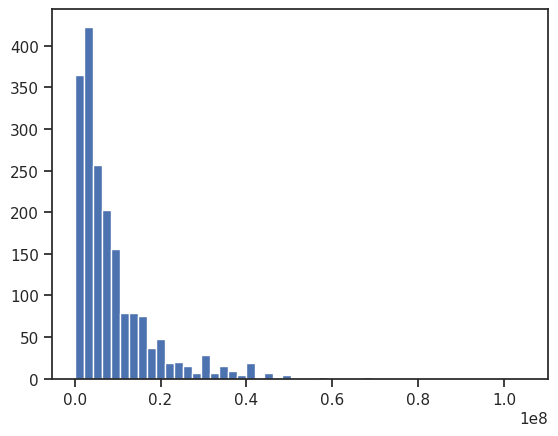

In [99]:
plt.hist(data['PRICE'], 50)
plt.show()

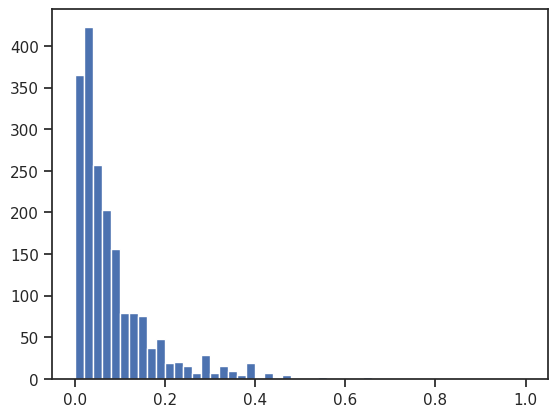

In [100]:
plt.hist(sc1_data, 50)
plt.show()

### **Масштабирование данных на основе Z-оценки - StandardScaler**

In [101]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['PRICE']])

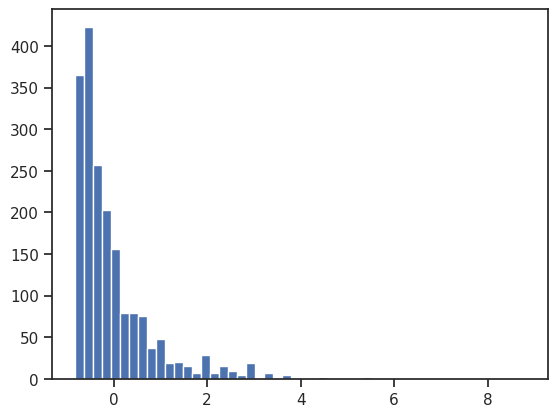

In [102]:
plt.hist(sc2_data, 50)
plt.show()